<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/%EA%B9%80%EC%86%8C%EC%9B%94_%EC%8B%9C_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 구글 드라이브와 연결
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.4
!pip install rhinoMorph

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [911 k

In [5]:
# 경로 변경
%cd /content/gdrive/My\ Drive/pytest/

/content/gdrive/My Drive/pytest


In [0]:
# 데이터 로딩
def read_data(filename, encoding='utf8'):                # 읽기 함수 정의 , 한국어 사용하는 거 : euc-kr(ANSI이랑 거의 비슷), ANSI -> euc-kr의 약간 확장판, cp949 -> euc-kr의 약간 확장판 euc-kr = cp949(ms949) = ANSI/ utf8 -> 세계의 모든 언어를 다담음.
  with open(filename, 'r', encoding=encoding) as f:
    data = f.read()              
    return data
def write_data(data, filename, encoding='utf8'):         # 쓰기 함수도 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(filename)

data = read_data('김소월시.txt', encoding='utf8')  # 전체파일은 ratings.txt (긍정 1만, 부정 1만)

In [0]:
# 데이터 확인
print(len(data)) #500행
print(len(data[0])) 
print(data[0])
print(data[0:3])
print(data)

In [35]:
# 전체 데이터 형태소 분석

import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data_list = []

morphed_data = rhinoMorph.onlyMorph_list(rn, data, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)

for morphed_data_each in morphed_data:
  morphed_data_list.append(morphed_data_each)

print(morphed_data_list)

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
['못', '잊다', '김', '소', '못', '잊다', '생각', '그런대로', '한세상', '지내다', '사노', '잊히다', '못', '잊다', '생각', '그런대로', '세월', '만', '가다', '못', '잊다', '더러', '잊히다', '그러나', '또', '한끝', '이렇다', '그립다', '살뜰히', '못', '잊다', '어쩌면', '생각', '뜨다', '지나다', '삭주', '구성', '물', '사흘', '배', '사흘', '멀다', '삼천리', '더더구나', '걷다', '넘다', '멀다', '삼천리', '삭주', '구성', '은', '산', '넘다', '요', '물', '맞다', '함빡', '히', '젖다', '제비', '가', '비', '걸리다', '오노', '저녁', '높다', '산', '밤', '높다', '산', '삭주', '구성', '은', '산', '넘다', '멀다', '가끔가끔', '꿈', '가다', '다', '오다', '돌아오다', '길이', '서로', '떠나다', '몸', '몸', '그립다', '님', '두다', '곳', '곳', '그립다', '못', '보다', '새들', '집', '그립다', '남북', '으', '오다', '하다', '들다', '끝', '날아가다', '날다', '구름', '밤', '바로', '가', '텐', '삭주', '구성', '은', '산', '넘다', '멀다', '접동새', '접동', '접동', '아우', '비다', '접동', '진두', '강', '가람', '가', '살다', '누나', '진두', '강', '앞마을', '오다', '울다', '옛날', '나라', '멀다', '뒤쪽', '진두', '강', '가람', 

In [0]:
write_data(morphed_data_list, '김소월시.txt', encoding='utf8')

In [40]:
print(morphed_data_list)

['못', '잊다', '김', '소', '못', '잊다', '생각', '그런대로', '한세상', '지내다', '사노', '잊히다', '못', '잊다', '생각', '그런대로', '세월', '만', '가다', '못', '잊다', '더러', '잊히다', '그러나', '또', '한끝', '이렇다', '그립다', '살뜰히', '못', '잊다', '어쩌면', '생각', '뜨다', '지나다', '삭주', '구성', '물', '사흘', '배', '사흘', '멀다', '삼천리', '더더구나', '걷다', '넘다', '멀다', '삼천리', '삭주', '구성', '은', '산', '넘다', '요', '물', '맞다', '함빡', '히', '젖다', '제비', '가', '비', '걸리다', '오노', '저녁', '높다', '산', '밤', '높다', '산', '삭주', '구성', '은', '산', '넘다', '멀다', '가끔가끔', '꿈', '가다', '다', '오다', '돌아오다', '길이', '서로', '떠나다', '몸', '몸', '그립다', '님', '두다', '곳', '곳', '그립다', '못', '보다', '새들', '집', '그립다', '남북', '으', '오다', '하다', '들다', '끝', '날아가다', '날다', '구름', '밤', '바로', '가', '텐', '삭주', '구성', '은', '산', '넘다', '멀다', '접동새', '접동', '접동', '아우', '비다', '접동', '진두', '강', '가람', '가', '살다', '누나', '진두', '강', '앞마을', '오다', '울다', '옛날', '나라', '멀다', '뒤쪽', '진두', '강', '가람', '가', '살다', '누나', '의붓어미', '시샘', '죽다', '누나', '부르다', '오오', '불다', '섧다', '시새움', '몸', '죽다', '누나', '죽다', '접동새', '되다', '남다', '되다', '오다', '랩', '동생', '죽다', '못', '잊다', '차마', '못

In [42]:
from collections import Counter
wordInfo = Counter(morphed_data_list)  	    # 하나의 리스트로 결합된 요소를 카운트한다 (내림차순)
print('wordInfo:', wordInfo)

wordInfo: Counter({'산': 21, '가다': 19, '잊다': 17, '오다': 11, '하다': 11, '못': 10, '울다': 10, '그립다': 9, '들다': 9, '죽다': 9, '꽃': 9, '멀다': 8, '길': 8, '가': 7, '밤': 7, '님': 6, '보다': 6, '되다': 6, '이': 6, '모르다': 6, '그': 6, '이름': 6, '넘다': 5, '저녁': 5, '부르다': 5, '말': 5, '눈': 5, '예전': 5, '미처': 5, '봄': 5, '노래': 5, '사람': 5, '피다': 5, '생각': 4, '삭주': 4, '구성': 4, '물': 4, '은': 4, '곳': 4, '접동': 4, '살다': 4, '누나': 4, '자다': 4, '새다': 4, '불귀': 4, '달이다': 4, '없다': 4, '꽃잎': 4, '때': 4, '사랑하다': 4, '히': 3, '몸': 3, '두다': 3, '집': 3, '진두': 3, '강': 3, '오늘': 3, '위': 3, '다시': 3, '없이': 3, '베개': 3, '잠': 3, '흰눈': 3, '여울': 3, '가지': 3, '가마귀': 3, '공중': 3, '가시다': 3, '지네': 3, '부르노': 3, '그런대로': 2, '사노': 2, '잊히다': 2, '그러나': 2, '또': 2, '사흘': 2, '삼천리': 2, '젖다': 2, '걸리다': 2, '높다': 2, '꿈': 2, '다': 2, '길이': 2, '날다': 2, '접동새': 2, '가람': 2, '남다': 2, '슬피': 2, '훗날': 2, '그때': 2, '나무라다': 2, '그리다': 2, '그래': 2, '어제': 2, '오리나무': 2, '시': 2, '내리다': 2, '삼수갑산': 2, '에': 2, '돋다': 2, '설움': 2, '이르다': 2, '창': 2, '아롱아롱': 2, '비치다': 2, '눈물': 2, '사랑': 2, '바다': 2, '변

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51082 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_

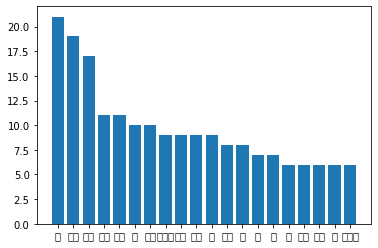

In [44]:
# 앞에서 20개까지만 출력 (전체를 그리게 되면 제대로 나타나지 않아서)
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프에서 한글표현을 위해 폰트를 설치
%config InlineBackend.figure_format = 'retina'   # 폰트가 깨끗하게 보이도록 설정
!apt-get -qq -y install fonts-nanum > /dev/null      # 나눔 폰트 설치

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

안녕하세요


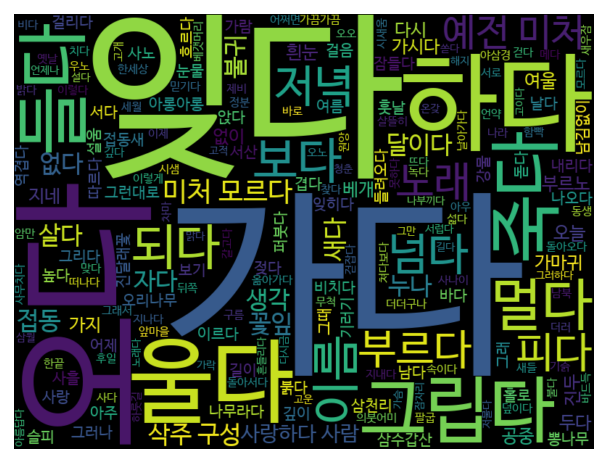

In [48]:
!pip install wordcloud                       # 만약 워드클라우드 패키지가 없다고 나오면 이를 설치한다
from wordcloud import WordCloud
cloud = WordCloud(font_path=fontpath, width=800, height=600).generate(" ".join(morphed_data_list))
plt.imshow(cloud, interpolation='bilinear')   # 글자를 더 부드럽게 나오게 한다
plt.axis('off')
plt.show()